In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [7]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [8]:
X

array([[ 2.71215836, -9.64176042],
       [-7.36980404, -5.2951184 ],
       [-6.19776666, -3.86017335],
       ...,
       [ 1.85824058, -8.44580517],
       [ 4.16438839, -8.38950063],
       [ 2.81099733, -7.69472717]], shape=(1000, 2))

In [9]:
y

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0,
       1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0,

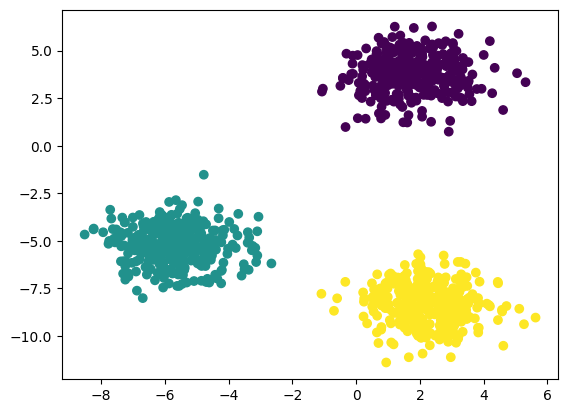

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
# feature scaling technique ---> Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [18]:
## elbow method
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


In [19]:
wcss

[1340.0000000000002,
 675.342423103098,
 76.04299056943141,
 64.31307621944421,
 55.78419100834774,
 44.040089257562585,
 40.61714894131951,
 36.63412205287286,
 34.30057231179671,
 30.55559500558444]

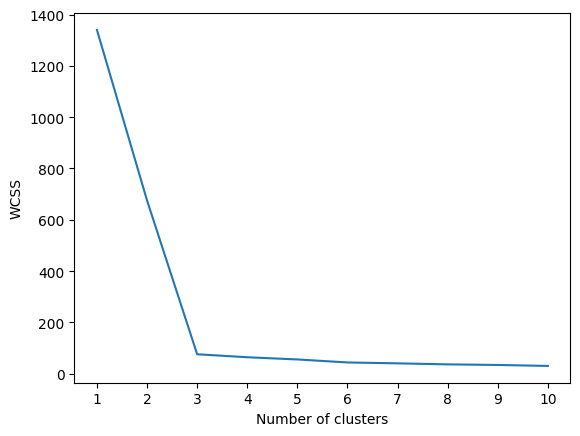

In [20]:
## plot the elbow curve with this wcss 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [22]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,

In [23]:
y_pred = kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1,
       1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0,

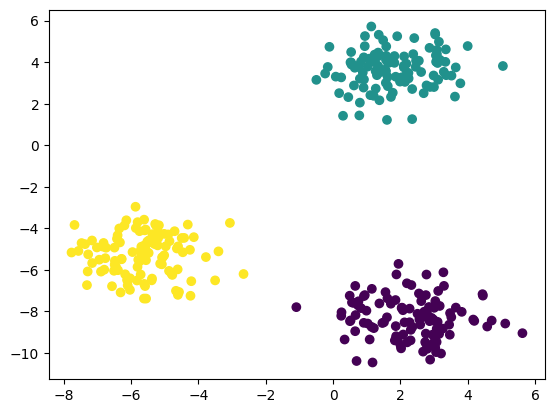

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

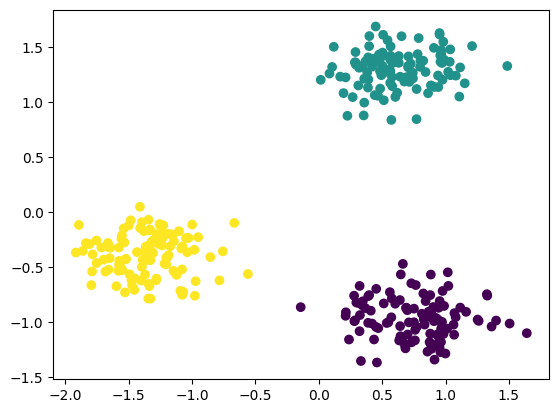

In [26]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c = y_pred)

In [27]:
## validation of k value
# 1) Knee locator
# 2) Silhoutee scoring

In [28]:
## Kneelocator
from kneed import KneeLocator

In [29]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [30]:
kl.elbow

np.int64(3)

In [31]:
## silhoutte scoring
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficient.append(score)

In [33]:
silhouette_coefficient

[0.5905070576055367,
 0.8081162968972528,
 0.6496470896038042,
 0.5016205065987197,
 0.480656075809736,
 0.34219473500950776,
 0.3284025865279677,
 0.3214244838694889,
 0.3294105259234337]

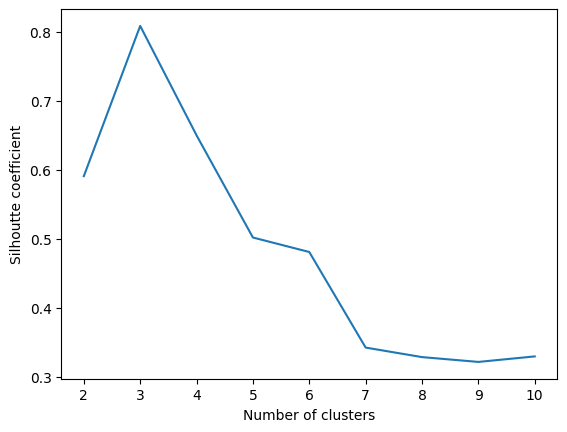

In [34]:
## ploting the silhoutee scores
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte coefficient")
plt.show()